<a href="https://colab.research.google.com/github/azecoder/ML/blob/master/ML_CUP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and Dataset**

In [0]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import time

from google.colab import drive
drive.mount('/gdrive', force_remount=True)

filepath = '/gdrive/My Drive/Projects/ML/ML-CUP19-TR.csv'

dataset = np.loadtxt(filepath, skiprows=7, delimiter=",")

# print(dataset[:2,:])

Mounted at /gdrive


# **Keras**

In [0]:
### Import Keras Libraries

import keras
from tensorflow.keras import backend
from tensorflow.keras.models import Sequential
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Nadam

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout

# for tensorflow update error
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
tf.get_default_graph()

import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


Instructions for updating:
non-resource variables are not supported in the long term


In [0]:
# split dataset into input and target datasets
data_x, data_y = dataset[:,1:21], dataset[:,21:23]

# split datasets into train and test parts
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=1)
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25)

print("-- X Train ---------")
print(">> shape:", x_train.shape)
print(x_train[:2][:], "\n\n")

# scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.fit_transform(x_val)
y_train_scaled = scaler.fit_transform(y_train)
y_val_scaled = scaler.fit_transform(y_val)

-- X Train ---------
>> shape: (1059, 20)
[[ 1.22455735 -0.9255083  -1.31409293 -0.96642529 -1.7143248   0.46629292
   1.28948303 -1.17428776  1.22452995 -1.71432645  0.46627955  0.53645618
   0.53647701 -0.96643818  1.64324609 -1.17427994  1.2894973  -1.31409343
  -0.92551733  1.64325157]
 [-0.85917111  0.36931281 -0.67237912  1.05624518  1.80687371 -0.6360141
  -1.34147396  0.48496637 -0.85917896  1.80686828 -0.63602575 -0.59463131
  -0.59462947  1.05627461 -0.92467186  0.48494961 -1.34146399 -0.67238604
   0.36934036 -0.92468998]] 




In [0]:
### Define Grid Search parameters
epochs = [100, 200, 500, 1000]
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
lr = [0.0001, 0.001, 0.01, 0.1]
momentum = [0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89]
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']

#dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
batches = [5, 10, 20, 40, 50]
neurons = [1, 5, 10, 15, 20, 25, 30]

In [0]:
### Function to create model, required for KerasRegressor
def create_model_1():
# def create_model_1(optimizer="adam"):
  model = Sequential()
  model.add(Dense(50, input_dim=20, activation='relu'))
  model.add(Dense(2, activation='linear'))
  model.compile(loss='mean_squared_error', optimizer="SGD", metrics=['mse'])
  # model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
  return model

### Create Model
model = KerasRegressor(build_fn=create_model_1, verbose=0)
# param_grid = dict(optimizer=optimizer, epochs=epochs, batch_size=batches)
param_grid = dict(epochs=epochs, batch_size=batches)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

# Results of CV Grid Search
grid_result = grid.fit(x_train_scaled, y_train_scaled)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [0]:
### Function to create model, required for KerasRegressor
def create_model_2(lr=0.05, momentum=0, activation='relu'):
  model = Sequential()
  model.add(Dense(50, input_dim=20, activation=activation))
  model.add(Dense(2, activation='linear'))
  optimizer = SGD(lr=lr, momentum=momentum)
  model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
  return model

### Create Model
backend.clear_session()
model = KerasRegressor(build_fn=create_model_2, epochs=15000, batch_size=None, verbose=0)
lr = [0.05]
momentum = [0.16, 0.32, 0.48, 0.64, 0.8, 0.98]
param_grid = dict(momentum=momentum) #, activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

# Results of CV Grid Search
grid_result = grid.fit(x_train_scaled, y_train_scaled)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# Best: -0.003724 using {'lr': 0.05, 'momentum': 0.24}
# Best: -0.003479 using {'lr': 0.05, 'momentum': 0.54}
# Best: -0.003220 using {'lr': 0.05, 'momentum': 0.78}
# Best: -0.003067 using {'lr': 0.05, 'momentum': 0.88}

# Best: -0.003163 using {'lr': 0.05, 'momentum': 0.87}

# Best: -0.003984 using {'lr': 0.05, 'momentum': 0.02}
# Best: -0.003869 using {'lr': 0.05, 'momentum': 0.12}
# Best: -0.003737 using {'lr': 0.05, 'momentum': 0.28}
# Best: -0.003678 using {'lr': 0.05, 'momentum': 0.32}
# Best: -0.003568 using {'lr': 0.05, 'momentum': 0.40}
# Best: -0.003452 using {'lr': 0.05, 'momentum': 0.56}
# Best: -0.003284 using {'lr': 0.05, 'momentum': 0.68}
# Best: -0.003220 using {'lr': 0.05, 'momentum': 0.78}
# Best: -0.003266 using {'lr': 0.05, 'momentum': 0.82}
# Best: -0.003366 using {'lr': 0.05, 'momentum': 0.94}

## for 15000 epochs
# Best: -0.003131 using {'lr': 0.05, 'momentum': 0.1}
# Best: -0.002992 using {'lr': 0.05, 'momentum': 0.2}
# Best: -0.003239 using {'lr': 0.05, 'momentum': 0.16}

## dataset changed
# Best: -0.003510 using {'momentum': 0.6}
# Best: -0.003010 using {'momentum': 0.35}

## after split point fixed
# Best: -0.003317 using {'momentum': 0.32}

Best: -0.003849 using {'momentum': 0.48}
-0.004425 (0.001035) with: {'momentum': 0.16}
-0.003893 (0.000611) with: {'momentum': 0.32}
-0.003849 (0.000637) with: {'momentum': 0.48}
-0.004214 (0.001061) with: {'momentum': 0.64}
-0.004036 (0.000503) with: {'momentum': 0.8}
-0.006339 (0.000418) with: {'momentum': 0.98}


In [0]:
### Making Final Model
backend.clear_session()
model = Sequential()
model.add(Dense(200, input_dim=20, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))
model.add(Dense(2, activation='linear'))
## epoch 1500 & 1000
# optimizer = SGD(lr=0.01, momentum=0.9) # MSE - (15000: 1.1496860107060427)
# optimizer = SGD(lr=0.05, momentum=0.3) # MSE - (15000: 1.1369810053475358)
# optimizer = SGD(lr=0.05, momentum=0.77) # MSE - (1000: 1.0696862701320426) - (1500: 1.1154326141548228) - (15000: )
# optimizer = SGD(lr=0.05, momentum=0.87) # MSE - (1500: 1.1045064122648667) - (15000: 1.22)
# optimizer = SGD(lr=0.05, momentum=0.16) # MSE - (1500: 1.1045064122648667) - (15000: 1.1001173771690587)

## epoch 15000
# optimizer = SGD(lr=0.05, momentum=0.6) # MSE - (15000: 1.137025682663081)
# optimizer = SGD(lr=0.05, momentum=0.5) # MSE - (15000: 1.1784226023063604)
# optimizer = SGD(lr=0.05, momentum=0.48) # MSE - (15000: ) 
# optimizer = SGD(lr=0.05, momentum=0.35) # MSE - (15000: 1.1865656099071837) 
# optimizer = SGD(lr=0.05, momentum=0.3) # MSE - (15000: 1.164096231340311) 677.9862568378448
optimizer = SGD(lr=0.01, momentum=0.3) # MSE - (15000: 1.0640501826657358) 701.7448711395264
# optimizer = SGD(lr=0.05, momentum=0.32) # MSE - (15000: 1.190183542745709) 676.2758705615997 SECONDS
# optimizer = SGD(lr=0.05, momentum=0.68) # MSE - (10000: 1.1387168157903866) 456.4504363536835 seconds
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])

In [0]:
time_ST = time.time()

# Fit the model
history = model.fit(x_train_scaled, y_train_scaled, validation_data=(x_val_scaled, y_val_scaled), epochs=15000, verbose=0, batch_size=None)

y_predict = model.predict(x_val_scaled)

# Predict the targets
y_predict = scaler.inverse_transform(y_predict)
err = 0
for i in range (len(y_predict)):
    err = (math.sqrt(math.pow((y_predict[i,0] - y_val[i,0]),2) + math.pow((y_predict[i,1] - y_val[i,1]),2))) + err
err = err / len(y_predict)
print ("The Final Error:", err)

time_FN = time.time()
print ("Time:", time_FN - time_ST)

The Final Error: 1.022647322733586
Time: 769.7964217662811


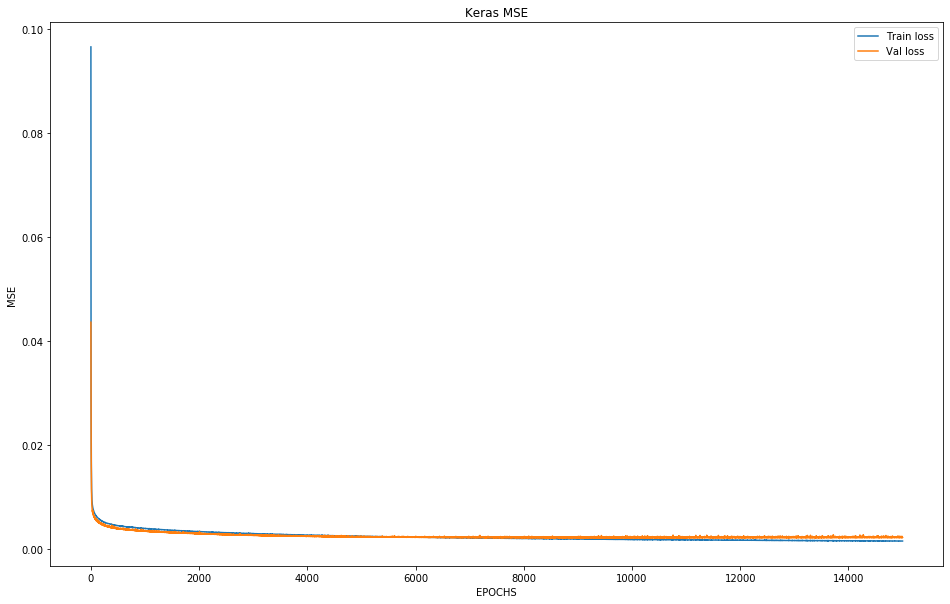

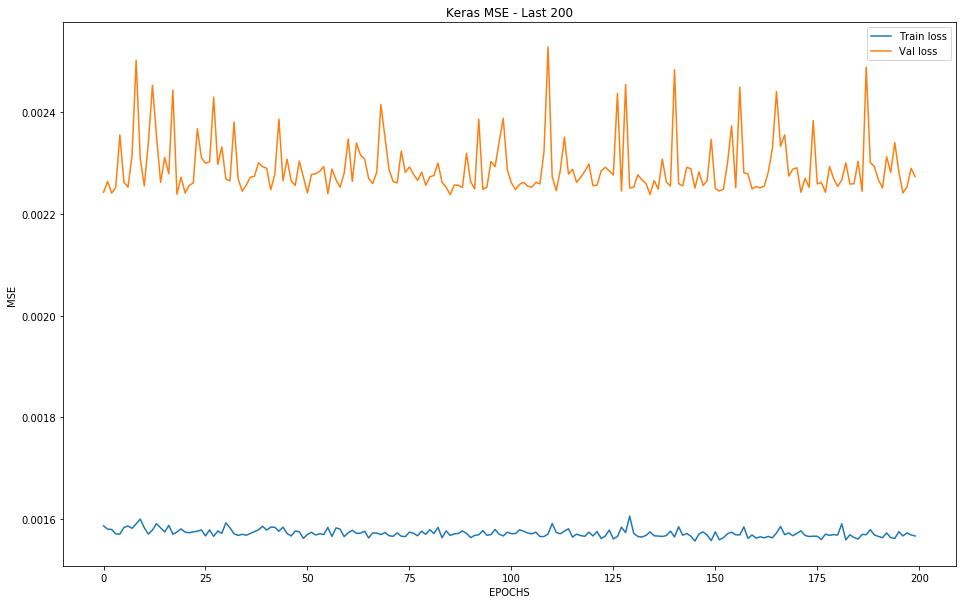

In [0]:
plt.figure(num=1, figsize=(16, 10))
plt.plot(history.history["loss"], label="Train loss")
plt.plot(history.history["val_loss"], label="Val loss")
plt.xlabel("EPOCHS")
plt.ylabel("MSE")
plt.title("Keras MSE")
plt.legend()
plt.show()

# visualize for the last 200 epochs
plt.figure(num=2, figsize=(16, 10))
plt.plot(history.history["loss"][-200:], label="Train loss")
plt.plot(history.history["val_loss"][-200:], label="Val loss")
plt.xlabel("EPOCHS")
plt.ylabel("MSE")
plt.title("Keras MSE - Last 200")
plt.legend()
plt.show()

In [0]:
### for Train and Test Datasets
x = scaler.fit_transform(data_x)
y = scaler.fit_transform(data_y)

# Fit the model
model.fit(x, y, epochs=15000, verbose=0, batch_size=None)

filepath = '/gdrive/My Drive/Projects/ML/ML-CUP19-TS.csv'
dataset_test = np.loadtxt(filepath, skiprows=7, delimiter=",")
x_test = dataset_test[:,1:21]

y_predict = model.predict(x_test)

# Predict the targets
y_predict = scaler.inverse_transform(y_predict)

In [0]:
### save data to csv
import csv

with open('/gdrive/My Drive/Projects/ML/Results/AzeStuds-ML-CUP19-TS_Keras-15k-e1.02264.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["# TABRIZ HAJIYEV MEHRDAD BABAZADEH"])
    writer.writerow(["# AZESTUDS"])
    writer.writerow(["# ML-CUP19"])
    writer.writerow(["# 26/1/2020"])
    idx = 1
    for a,b in y_predict:
      writer.writerow([idx,a,b])
      idx = idx + 1

## **Other Experiments and Tries - Keras**

In [0]:
def __create_model():
  model = Sequential()
  model.add(Dense(50, input_dim=20, activation='relu'))
  model.add(Dense(2, activation='sigmoid'))
  # Compile model
  # optimizer = keras.optimizers.SGD(lr=lr, momentum=momentum, nesterov=True)
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

__model = KerasClassifier(build_fn=__create_model, verbose=0)
# define the grid search parameters
batch_size = [10, 20, 40]
epochs = [50, 100, 500]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=__model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x_train_scaled, y_train_scaled)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [0]:
def __create_model_by_optimizer(optimizer='adam'):
	# create model
	model = Sequential()
	model.add(Dense(12, input_dim=8, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
	return model

__model = KerasClassifier(build_fn=__create_model_by_optimizer, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=__model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [0]:
### Function to create model, required for KerasClassifier
# - No default parameter in method
# - Dense activation is "relu", for output "sigmoid"
# - model optimizer is "adam"
def create_model():
  model = Sequential()
  model.add(Dense(50, input_dim=20, activation='relu'))
  model.add(Dense(2, activation='sigmoid'))
  # Compile model
  # optimizer = keras.optimizers.SGD(lr=lr, momentum=momentum, nesterov=True)
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['mse'])
  return model

### Create Model
# model = KerasClassifier(build_fn=create_model, verbose=0)
model = KerasRegressor(build_fn=create_model, epochs=1000, batch_size=None, verbose=0)
# - Define CV Grid Search parameters.. batch sizes and epochs
# - 3-fold cross validation is used
# - n_jobs=-1 => process will use all cores on my machine
batch_size = [20, 40, 60, 80, 100]
epochs = [500, 1000, 2000]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

# Results of CV Grid Search
grid_result = grid.fit(x_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [0]:
### Function to create model using optimizerf, required for KerasClassifier
# - Default parameter.. (optimizer is "adam")
# - Dense activation is "relu", for output "sigmoid"
def create_model_by_optimizer(optimizer='adam'):
	# create model
	model = Sequential()
	model.add(Dense(50, input_dim=20, activation='relu'))
	model.add(Dense(2, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['mse'])
	return model


### Create Model
# Default:
# 	- epochs size: 2500
# 	- batch size: 40 
model = KerasRegressor(build_fn=create_model_by_optimizer, epochs=1000, batch_size=40, verbose=0)
# - Define CV Grid Search parameters.. optimizers
# - 3-fold cross validation is used
# - n_jobs=-1 => process will use all cores on my machine
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

# Results of CV Grid Search
grid_result = grid.fit(x_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [0]:
### Function to create model using lr and momentum, required for KerasClassifier
# - Default parameter.. (learn rate is "0.01" and momentum is "0")
# - Dense activation is "relu", for output "sigmoid"
def create_model_by_LR_and_Momentum(learn_rate=0.01, momentum=0):
	# create model
	model = Sequential()
	model.add(Dense(50, input_dim=20, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	optimizer = SGD(lr=learn_rate, momentum=momentum)
	model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
	return model


### Create Model
# Default:
# 	- epochs size: 2500
# 	- batch size: 40 
model = KerasClassifier(build_fn=create_model_by_LR_and_Momentum, epochs=2500, batch_size=40, verbose=0)
# - Define CV Grid Search parameters.. learn rates and momentum values
# - 3-fold cross validation is used
# - n_jobs=-1 => process will use all cores on my machine

param_grid = dict(learn_rate=learn_rate, momentum=momentum)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

# Results of CV Grid Search
grid_result = grid.fit(x_train[:,:20], y_train[:,1])
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [0]:
# fig, axs = plt.subplots(2, 2)
# axs[0, 0].plot(x, y)
# axs[0, 0].set_title('Axis [0,0]')
# axs[0, 1].plot(x, y, 'tab:orange')
# axs[0, 1].set_title('Axis [0,1]')
# axs[1, 0].plot(x, -y, 'tab:green')
# axs[1, 0].set_title('Axis [1,0]')
# axs[1, 1].plot(x, -y, 'tab:red')
# axs[1, 1].set_title('Axis [1,1]')

In [0]:
from random import randint

def getRandValue(arr):
  if arr and len(arr):
    rIdx = randint(0, len(arr) - 1)
    return arr[rIdx]
  return None


def randomFit(grid_values, model, data_values, count):
  retData = {}
  for epoch in grid_values["epochs"]:
    retData[epoch] = []
  for idx in range(count):
    lr = getRandValue(grid_values["compiler"]["lr"])
    momentum = getRandValue(grid_values["compiler"]["momentum"])
    optimizer = keras.optimizers.SGD(lr=lr, momentum=momentum, nesterov=True)
    model.add(Dense(100, input_dim=20, activation='relu')) # input [100][20]
    model.add(Dense(2, activation='sigmoid')) # output
    model.compile(loss=keras.losses.mean_squared_error, optimizer=optimizer)

    epochs = getRandValue(grid_values["epochs"])
    batch_size = getRandValue(grid_values["batch_sizes"])
    history = model.fit(data_values["x"], data_values["y"], epochs=epochs, validation_data=(data_values["val_x"], data_values["val_y"]), batch_size=batch_size, verbose=0)

    retData[epochs].append({
        "lr": lr,
        "momentum": momentum,
        "batch_size": batch_size,
        "result": history,
    })
    # pprint(retData)
  return retData

In [0]:
from pprint import pprint

import keras
from keras.models import Sequential
model = Sequential()

# for tensorflow update error
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
tf.get_default_graph()

from keras.layers import Dense
# model.add(Dense(100, input_dim=20, activation='relu')) # input [100][20]
# model.add(Dense(2, activation='sigmoid')) # output
# model.compile(loss=keras.losses.mean_squared_error, optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True))

grid_values = {
    "compiler": {
        "lr": [0.01],
        "momentum": [0.9],
        "nesterov": True
    },
    "epochs": [1000, 2000, 5000],
    "batch_sizes": [40, 60, 100]
}
data_values = {
    "x": x_train_scaled,
    "y": y_train_scaled,
    "val_x": x_val_scaled,
    "val_y": y_val_scaled
}

fitResults = randomFit(grid_values, model, data_values, 8)
pprint(fitResults)

# history = model.fit(x_train_scaled, y_train_scaled, epochs=500, validation_data=(x_val_scaled, y_val_scaled), batch_size=32, verbose=0)

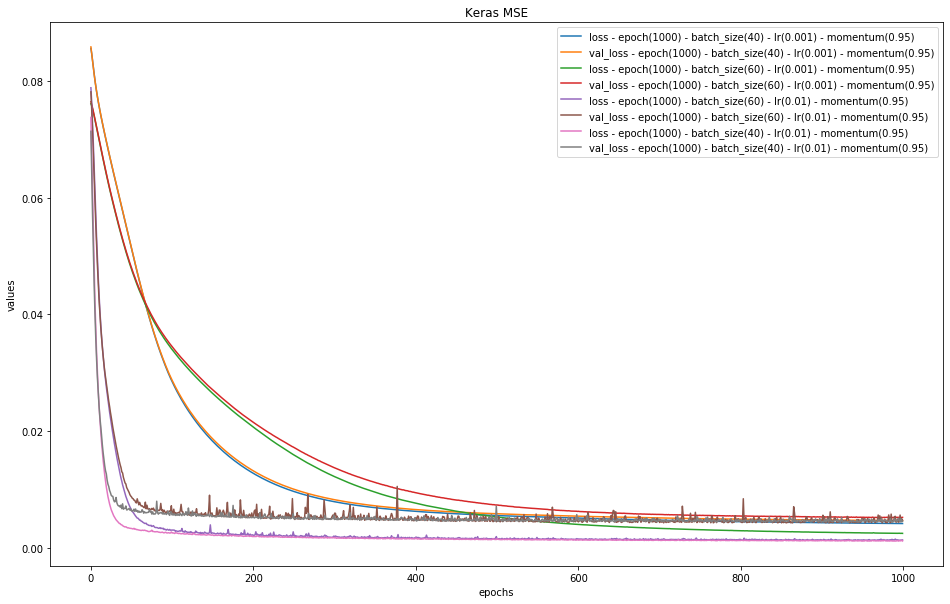

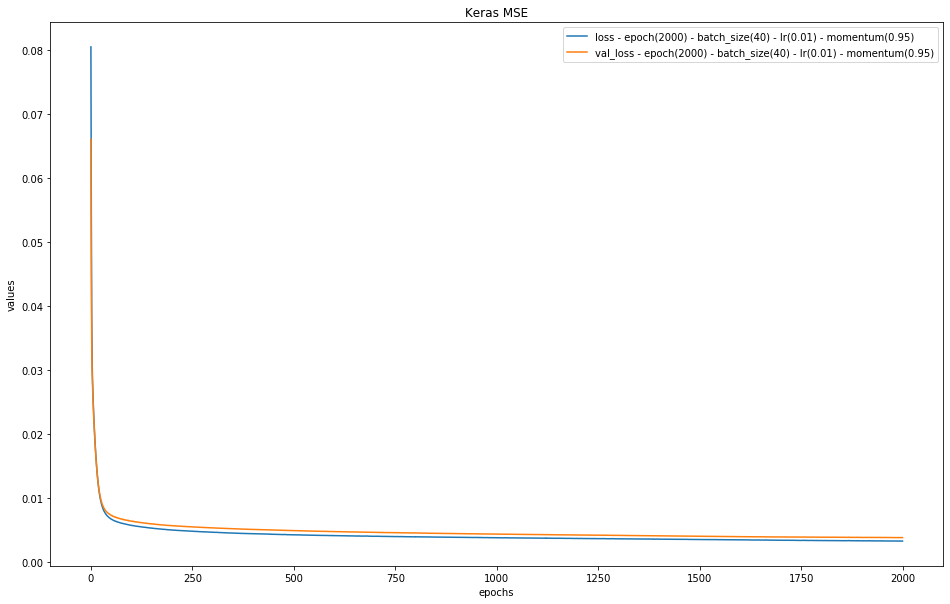

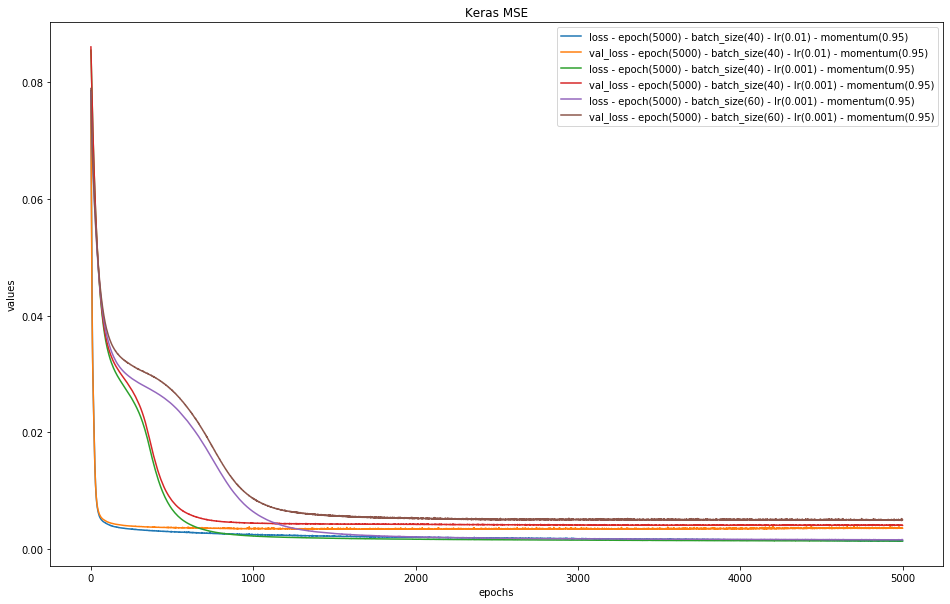

In [0]:
import matplotlib.pyplot as plt


for idx, epoch in enumerate(grid_values["epochs"], start=1):
  if len(fitResults[epoch]) == 0:
    continue
  plt.figure(num=idx, figsize=(16, 10))
  # try:
  for res in fitResults[epoch]:
    label = "loss - epoch(" + str(epoch) + ") - batch_size(" + str(res["batch_size"]) + ") - lr(" + str(res["lr"]) + ") - momentum(" + str(res["momentum"]) + ")"
    val_label = "val_" + label
    plt.plot(res["result"].history["loss"], label=label) # history["loss"][200:] for data after index 200
    plt.plot(res["result"].history["val_loss"], label=val_label)

  plt.xlabel("epochs")
  plt.ylabel("values")

  plt.title('Keras MSE')
  plt.legend()

  plt.show()
  # except:
  #   print("No index", epoch)

In [0]:
y_val_pred = model.predict(x_val_scaled, batch_size=128)
y_val_pred_inverse = scaler.inverse_transform(y_val_pred)

In [0]:
import math

mee = 0
for x in range( len(y_val) ):
    mee = mee + math.sqrt( math.pow(y_val[x,0] - y_val_pred_inverse[x,0], 2) + math.pow(y_val[x,1] - y_val_pred_inverse[x,1], 2) )

mee = mee / len( y_val )

print("MEE:", mee)


# **RFR - Random Forest Regression**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import math
import time

from google.colab import drive
drive.mount('/gdrive', force_remount=True)

filepath = '/gdrive/My Drive/Projects/ML/ML-CUP19-TR.csv'

dataset = np.loadtxt(filepath, skiprows=7, delimiter=",")
data_x, data_y = dataset[:,1:21], dataset[:,21:23]

dataset = np.loadtxt(filepath, skiprows=7, delimiter=",")
data_x, data_y = dataset[:,1:21], dataset[:,21:23]

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25)

scaler = MinMaxScaler(feature_range=(0, 1))
x_test_scaled = scaler.fit_transform(x_test)
x_val_scaled = scaler.fit_transform(x_val)
x_train_scaled = scaler.fit_transform(x_train)
y_test_scaled = scaler.fit_transform(y_test)
y_val_scaled = scaler.fit_transform(y_val)
y_train_scaled = scaler.fit_transform(y_train)

Mounted at /gdrive


In [0]:
time_ST = time.time()

rfr_model = RandomForestRegressor(n_estimators = 15000)
rfr_model.fit(x_train_scaled, y_train_scaled)
y_predict = rfr_model.predict(x_val_scaled)
y_predict = scaler.inverse_transform(y_predict)

err = 0
for i in range (len(y_predict)):
    err = (math.sqrt(math.pow((y_predict[i,0] - y_val[i,0]),2) + math.pow((y_predict[i,1] - y_val[i,1]), 2))) + err
err = err / len(y_predict)

print ("Error:", err)

time_FN = time.time()
print ("Time:", time_FN-time_ST)

Error: 0.9963885175101761
Time: 191.79813027381897


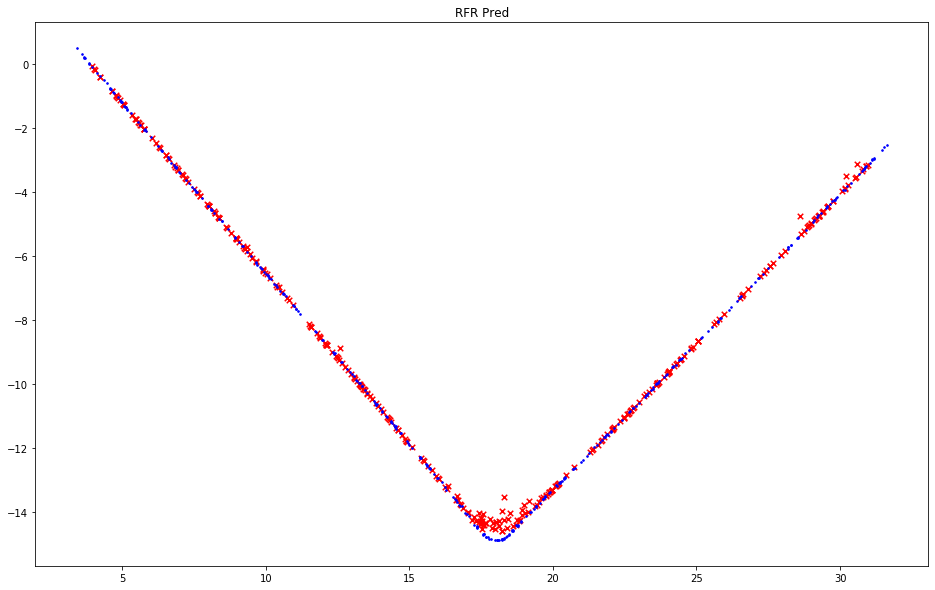

In [0]:
plt.figure(figsize=(16, 10))
plt.scatter(y_predict[:,0], y_predict[:,1], marker="x", color="red", s = 30)
plt.scatter(y_val[:,0], y_val[:,1], color="blue", s = 2.5)
plt.title("RFR Pred")
plt.show()

# **KNR - K Neighbours Regression**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import math
import time

from google.colab import drive
drive.mount('/gdrive', force_remount=True)

filepath = '/gdrive/My Drive/Projects/ML/ML-CUP19-TR.csv'

Mounted at /gdrive


In [0]:
from sklearn.model_selection import GridSearchCV

neighbors = list(range(1,50))
#making the instance
knr_model = KNeighborsRegressor(n_jobs=-1)
#Hyper Parameters Set
params = {'n_neighbors':neighbors, 
          # 'leaf_size':[1,2,3,5],
          # 'weights':['uniform', 'distance'],
          # 'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          # 'n_jobs':[-1]
        }
#Making models with hyper parameters sets
model = GridSearchCV(knr_model, param_grid=params, n_jobs=1)
#Learning
model.fit(x_train_scaled, y_train_scaled)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model.best_params_)

Best Hyper Parameters:
 {'n_neighbors': 5}


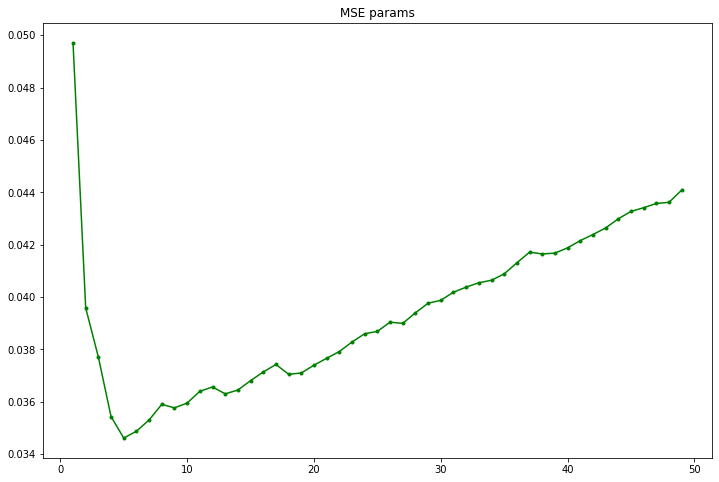

In [0]:
### find and plot mse params
mse = [1-x for x in model.cv_results_['mean_test_score']]

plt.figure(figsize=(12, 8))
plt.plot(neighbors, mse, marker='.', color='g')
plt.title("MSE params")
plt.show()

In [0]:
scaler = MinMaxScaler(feature_range=(0, 1))

time_ST = time.time()

ls = []
for idx in range(1, 20):
  # Split Data
  x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=1)
  x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25)

  x_test_scaled = scaler.fit_transform(x_test)
  x_val_scaled = scaler.fit_transform(x_val)
  x_train_scaled = scaler.fit_transform(x_train)
  y_test_scaled = scaler.fit_transform(y_test)
  y_val_scaled = scaler.fit_transform(y_val)
  y_train_scaled = scaler.fit_transform(y_train)

  knr = KNeighborsRegressor(n_neighbors=3)

  knr.fit(x_train_scaled, y_train_scaled[:,0])
  y_predict_st = knr.predict(x_val_scaled)
  # print(confusion_matrix(y_val_scaled, y_predict_st))
  # print(classification_report(y_val_scaled, y_predict_st))
  
  knr.fit(x_train_scaled, y_train_scaled[:,1])
  y_predict_nd = knr.predict(x_val_scaled)  
  # print(confusion_matrix(y_val_scaled, y_predict_nd))
  # print(classification_report(y_val_scaled, y_predict_nd))

  y_predict = np.concatenate(
      (y_predict_st.reshape((-1, 1)), y_predict_nd.reshape((-1, 1))),
      axis = 1
  )
  y_predict = scaler.inverse_transform(y_predict)

  err = 0
  for i in range (len(y_predict)):
    err = (math.sqrt(math.pow((y_predict[i,0] - y_val[i,0]),2) + math.pow((y_predict[i,1] - y_val[i,1]),2))) + err
  err = err / len(y_predict)

  ls.append(err)

# print(ls)
arr = np.array(ls)
print("Mean:", arr.mean())
print("Std:", arr.std())

time_FN = time.time()
print("Time:", time_FN - time_ST)

Mean: 1.0386087440846574
Std: 0.056604300970202526
Time: 0.43271970748901367


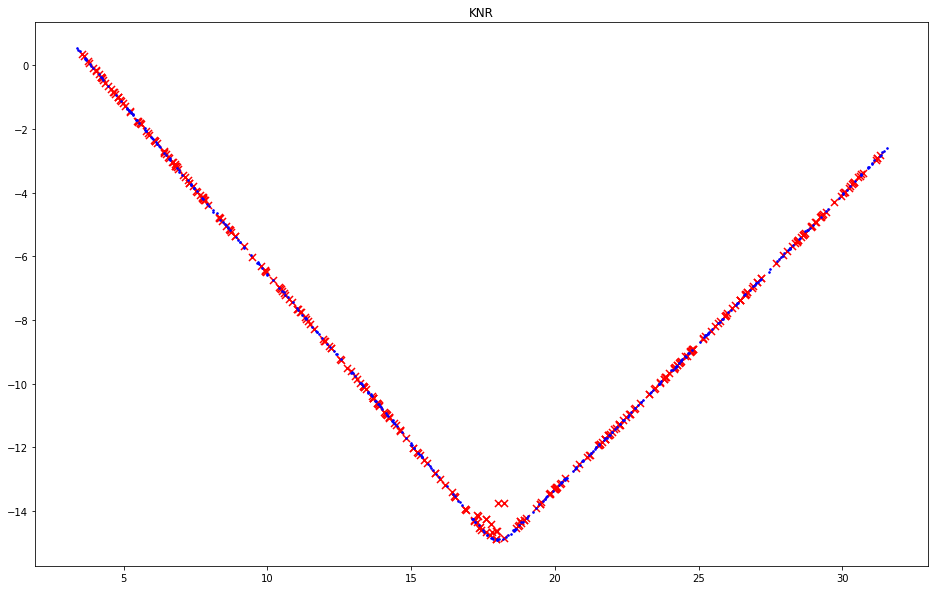

In [0]:
plt.figure(figsize=(16, 10))
plt.scatter(y_predict[:,0], y_predict[:,1], marker="x", color="red", s=50)
plt.scatter(y_val[:,0], y_val[:,1], color="blue", s = 2.5)
plt.title("KNR Pred")
plt.show()

In [0]:
### for Train and Test Datasets
x = scaler.fit_transform(data_x)
y = scaler.fit_transform(data_y)

filepath = '/gdrive/My Drive/Projects/ML/ML-CUP19-TS.csv'
dataset_test = np.loadtxt(filepath, skiprows=7, delimiter=",")
x_test = dataset_test[:,1:21]

knr = KNeighborsRegressor(n_neighbors=1)
# Fit the knr model
knr.fit(x, y)
y_predict = knr.predict(x_test)
y_predict = scaler.inverse_transform(y_predict)

In [0]:
### save data to csv
import csv

with open('/gdrive/My Drive/Projects/ML/Results/AzeStuds-ML-CUP19-TS_KNR-e1.0232.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["# TABRIZ HAJIYEV MEHRDAD BABAZADEH"])
    writer.writerow(["# AZESTUDS"])
    writer.writerow(["# ML-CUP19"])
    writer.writerow(["# 26/1/2020"])
    idx = 1
    for a,b in y_predict:
      writer.writerow([idx,a,b])
      idx = idx + 1